# Classify the handwriting in MNIST- Objects classification 

## 1. Machine Learning for freshers

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

## Softmax Regression
If you want to assign probabilities to an object being one of several different things, softmax is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.

To tally up the evidence that a given image is in a particular class, we do a weighted sum of the pixel intensities. The weight is negative if that pixel having a high intensity is evidence against the image being in that class, and positive if it is evidence in favor.


### Question :
Q： b的size为什么是[10], 为什么不是[None, 1]

A：x * W得到的是[None, 10]的矩阵，需要在每个样本上加上偏差b，这时应该在行方向上加一行,矩阵行列式变换里，矩阵mat加上一行a， a的shape应该是[1,10]，而不是[10,1]
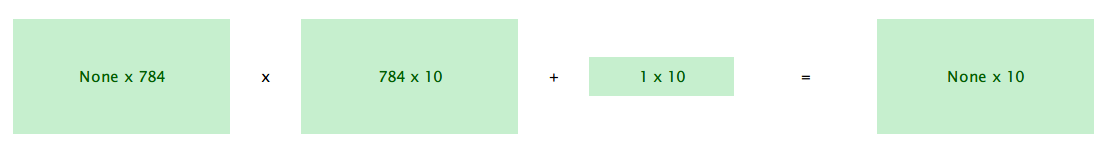

In [126]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [127]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y_ = tf.placeholder(tf.float32, [None, 10])

In [128]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [129]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=1))

In [130]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

In [131]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1000):
    x_train, y_train = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={
        x:x_train,
        y_:y_train
    })

In [136]:
sess.run([tf.equal(tf.argmax(y,1), tf.argmax(y_,1)), train_step], feed_dict={
        x:mnist.test.images,
        y_:mnist.test.labels
    })

[array([ True,  True,  True, ...,  True,  True,  True], dtype=bool), None]

In [133]:
predice_accu = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))

In [134]:
# 转换成tf.float16会出很大的错误
accuracy = tf.reduce_mean(tf.cast(predice_accu, tf.float32))

In [137]:
# print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
# Equals:
accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.91960001

## 2. Machine Learning For Experts

Basic Structure of CNN
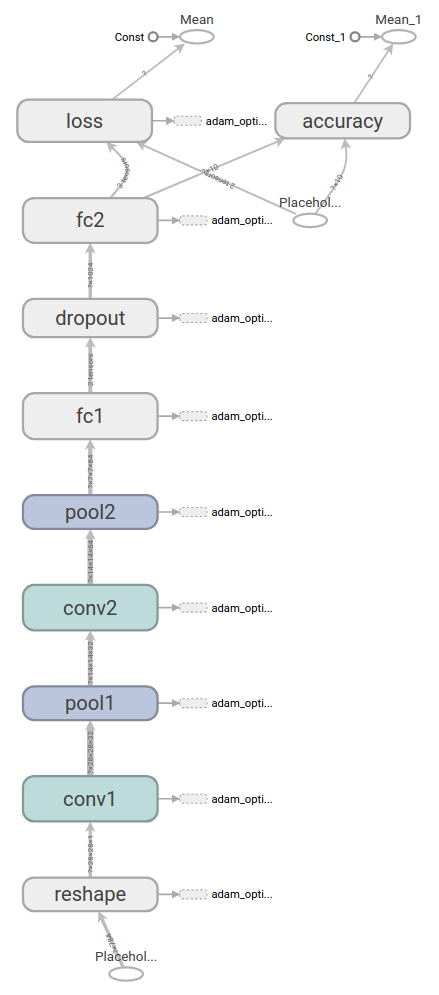